# **Question-1.**

**Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def eqn_grad_m_samples(X,Y):
    col = np.ones(X.shape[0])
    data = np.insert(X,0,col,axis = 1)
    w = np.random.randn(data.shape[1])
    gradj = np.zeros(len(w))
    loss_var =[]
    
    for i in range(4000):
        h = data@w
        loss = (np.sum((h-Y))/(2*data.shape[1]))
        loss_var.append(loss)
        for j in range(len(gradj)):
            gradj[j]= np.dot((h-Y),data[:,j])/data.shape[0]
            
        w = w - (0.01*gradj)
    return loss_var,w   B 

# Question-2.

**Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line.** 

In [23]:
import pandas as pd

# Load the data
df = pd.read_csv('univariate_linear_regression.csv')

# The first column is x (features) and the second column is y (labels)
X = df.iloc[:, 0].values.reshape(-1,1)
Y = df.iloc[:, 1].values


# Generate a grid of values for w0 and w1
w0 = np.linspace(-15, 10, 100)
w1 = np.linspace(-10, 10, 100)
w0, w1 = np.meshgrid(w0, w1)

# Call the previously defined function to perform linear regression
loss_var, w = eqn_grad_m_samples(X,Y)

# Print the values of w0 and w1
print('w0:', w[0])
print('w1:', w[1])


# Calculate the loss for each combination of w0 and w1
J = np.zeros(w0.shape)
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        h = w0[i,j] + w1[i,j]*X
        J[i,j] = np.sum((h-Y)**2)/(2*len(Y))

w0: -10.065140395524299
w1: 2.9726232036577014


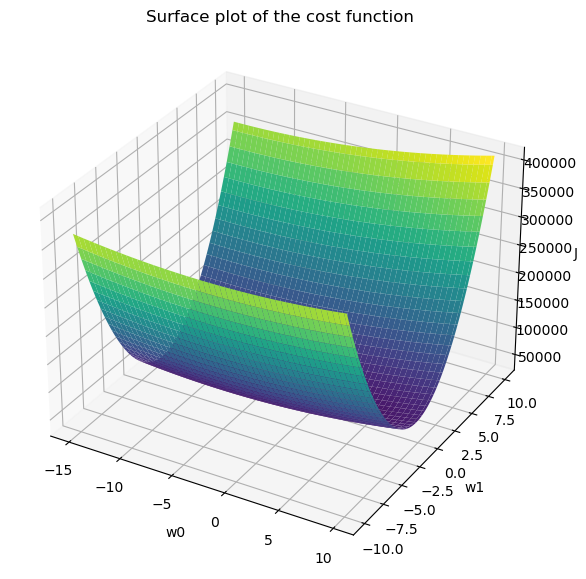

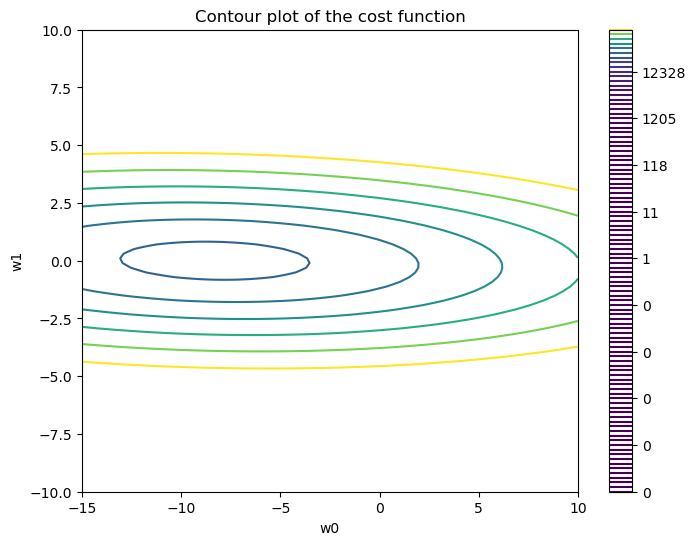

Text(0.5, 1.0, 'Best fit line')

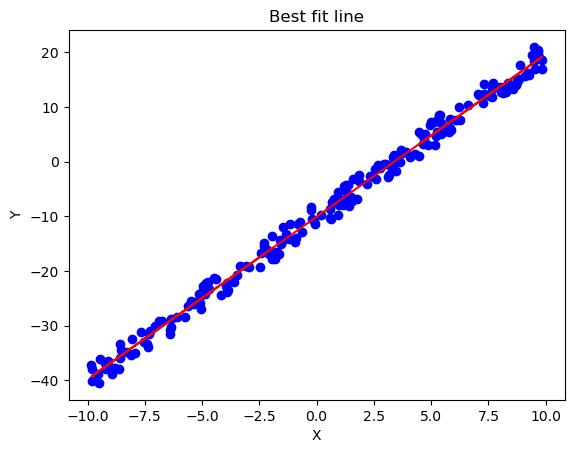

In [34]:
import matplotlib.pyplot as plt


# Create a surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w0, w1, J, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J')
ax.set_title('Surface plot of the cost function')


# Create a contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contour(w0, w1, J, levels=np.logspace(-5, 5, 100), cmap='viridis')

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_title('Contour plot of the cost function')
plt.colorbar(contour)
plt.show()

# Plot the best fit line
plt.figure()
plt.scatter(X, Y, color='blue')
plt.plot(X, X*w[1] + w[0], color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best fit line')

Text(0.5, 1.0, 'Cost function during gradient descent')

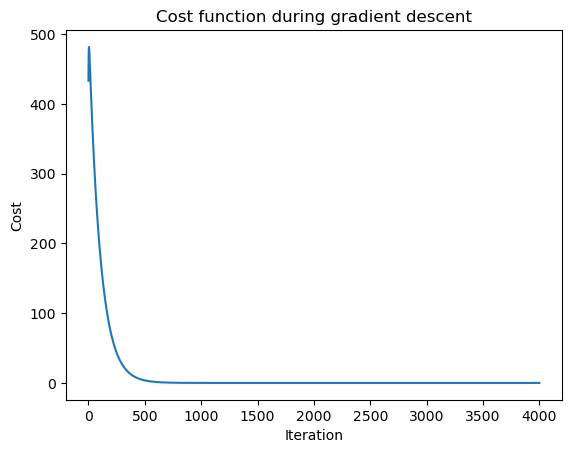

In [24]:
# Plot the cost function
plt.figure()
plt.plot(loss_var)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function during gradient descent')


# Question -3.

**Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?**

Final weights: [-0.0465355  -0.03458781 -0.03421203 -0.01534736  0.0650549  -0.03780839
  0.03274075]


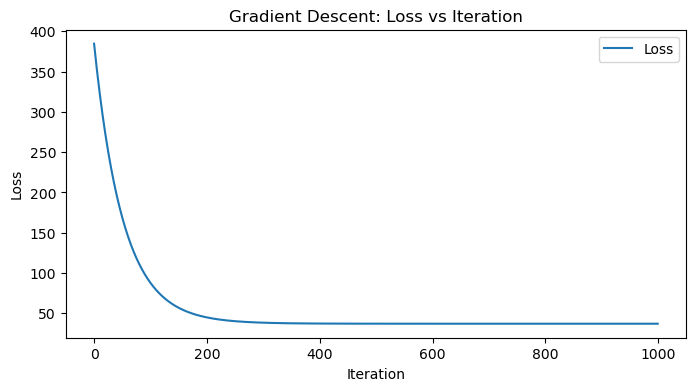

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def eqn_grad_msamples(x, y, learning_rate=0.01, num_iterations=1000):
    col = np.ones(x.shape[0])
    data = np.insert(x, 0, col, axis=1)
    w = np.random.randn(data.shape[1])
    gradj = np.zeros(len(w))
    loss_history = []
    for i in range(num_iterations):
        h = data @ w
        loss = (np.sum((h - y) ** 2)) / (2 * data.shape[1])
        loss_history.append(loss)
        for j in range(len(gradj)):
            gradj[j] = np.dot((h - y), data[:, j]) / data.shape[0]
        w = w - (learning_rate * gradj)  
    return loss_history, w

# Generate data
np.random.seed(0)
m = 500  # number of samples
n = 6    # number of features
x = np.random.randn(m, n)  # features
y = np.random.randn(m)     # target variable

loss_history, w = eqn_grad_msamples(x, y)

print("Final weights:", w)

# Plot the loss history
plt.figure(figsize=(8, 4))
plt.plot(loss_history, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent: Loss vs Iteration')
plt.legend()
plt.show()

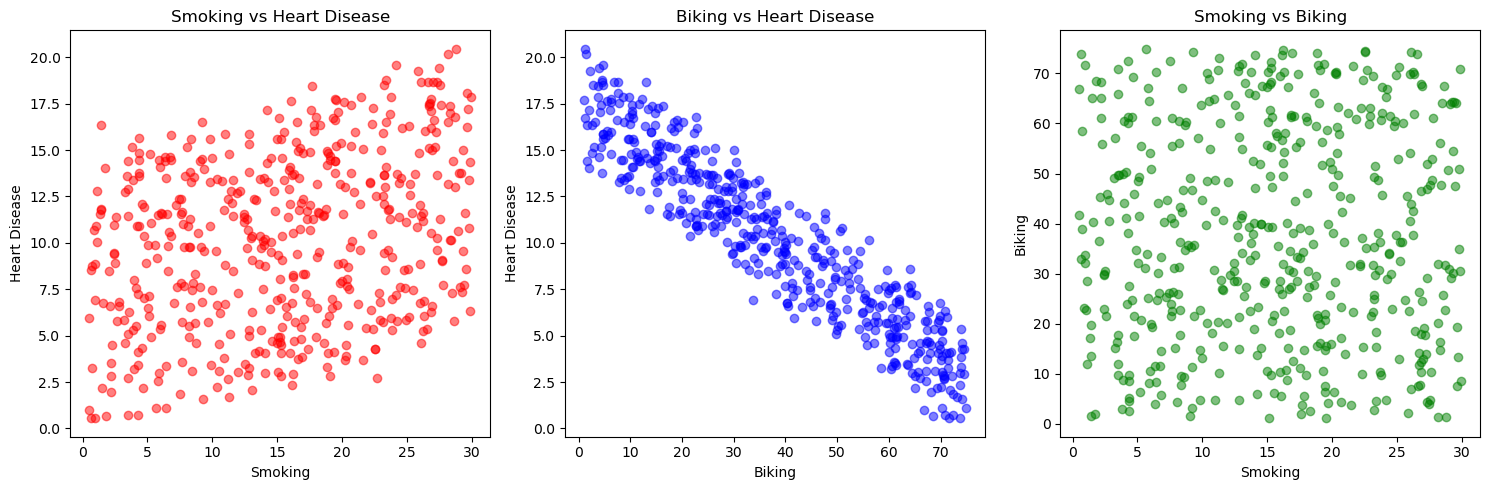

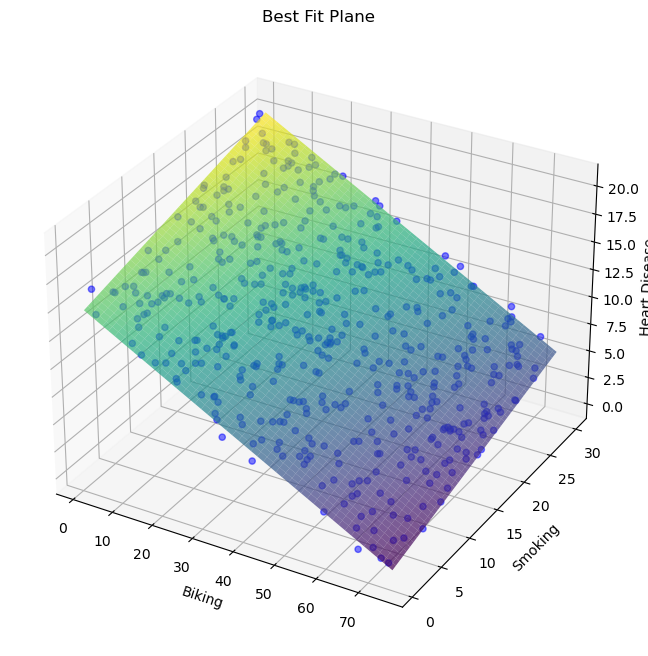

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('heart.data.csv')

# Extracting columns
x_0 = data['biking']
x_1 = data['smoking']
Y_label = data['heart.disease']

# Create a DataFrame with features and target
df = pd.DataFrame({'x_0': x_0, 'x_1': x_1, 'Y_label': Y_label})

# Perform linear regression
X = df[['x_0', 'x_1']].values
y = df['Y_label'].values

# Adding a constant term for intercept
X = np.column_stack((np.ones(len(X)), X))

# Computing the parameters using least squares estimation
w = np.linalg.lstsq(X, y, rcond=None)[0]

# Create grid for surface plot
x_0_range = np.linspace(min(x_0), max(x_0), 100)
x_1_range = np.linspace(min(x_1), max(x_1), 100)
X_0, X_1 = np.meshgrid(x_0_range, x_1_range)
Y_label_Predicted = w[0] + w[1] * X_0 + w[2] * X_1

# Plot the data points
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x_1, Y_label, color='red', alpha=0.5)
plt.title('Smoking vs Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')

plt.subplot(1, 3, 2)
plt.scatter(x_0, Y_label, color='blue', alpha=0.5)
plt.title('Biking vs Heart Disease')
plt.xlabel('Biking')
plt.ylabel('Heart Disease')

plt.subplot(1, 3, 3)
plt.scatter(x_1, x_0, color='green', alpha=0.5)
plt.title('Smoking vs Biking')
plt.xlabel('Smoking')
plt.ylabel('Biking')


plt.tight_layout()
plt.show()

# Plot the best fit plane
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x_0, x_1, Y_label, color='blue', alpha=0.5)
ax.plot_surface(X_0, X_1, Y_label_Predicted, cmap='viridis', alpha=0.7)
ax.set_title('Best Fit Plane')
ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')
plt.show()